# Get Data



In [46]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
url = 'https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/28AugCSVs/confirmed28Aug.csv?token=ALQ7JJRH3WVGQHDY3LCIWVK7KT2DO'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/28AugCSVs/deceased28Aug.csv?token=ALQ7JJVH5ILEJ7WS3HPV4P27KT2F6'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/28AugCSVs/recovered28Aug.csv?token=ALQ7JJT6AVYXZ5BL75Z7OYC7KT2IO'
recover = pd.read_csv(url, error_bad_lines=False)

## Population

In [47]:
population=pd.read_csv('https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/28AugCSVs/population.csv?token=ALQ7JJRNMBZ6KNF4B3NLSLS7KT2LE', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [48]:
# merge region
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

,Province/State,Country/Region,Lat,Long,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,...,21-Aug-20,22-Aug-20,23-Aug-20,24-Aug-20,25-Aug-20,26-Aug-20,27-Aug-20,28-Aug-20,Population,region
0,Andaman and Nicobar Islands,India,11.667026,92.735983,0,0,0,0,0,0,...,2743,2804,2856,2900,2941,2981,3014,3046,380581,India_Andaman and Nicobar Islands
1,Andhra Pradesh,India,14.750429,78.570026,1,1,1,1,1,3,...,334940,345216,353111,361712,371639,382469,393090,403616,49506799,India_Andhra Pradesh
2,Arunachal Pradesh,India,27.100399,93.616601,0,0,0,0,0,0,...,3126,3223,3263,3312,3412,3555,3633,3745,1383727,India_Arunachal Pradesh
3,Assam,India,26.244156,92.537842,0,0,0,0,0,0,...,87807,89367,90639,92518,94491,96670,98706,101266,31205576,India_Assam
4,Bihar,India,25.785414,87.479973,0,0,0,0,0,0,...,117671,119909,122156,123383,124827,126990,128850,130848,104099452,India_Bihar
5,Chandigarh,India,30.719997,76.780006,0,0,0,0,0,1,...,2631,2776,2918,3035,3209,3376,3564,3724,1055450,India_Chandigarh
6,Chattisgarh,India,21.295132,81.828232,0,0,0,0,0,1,...,19510,20214,20918,22054,23341,24550,25988,27233,25545198,India_Chattisgarh
7,Dadra and Nagar Haveli,India,20.266578,73.016618,0,0,0,0,0,0,...,2085,2125,2161,2179,2200,2222,2264,2293,453229,India_Dadra and Nagar Haveli
8,Daman and Diu,India,20.428300,72.839700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,326097,India_Daman and Diu
9,Delhi,India,28.669993,77.230004,7,7,7,8,10,14,...,158604,160016,161466,162527,164071,165764,167604,169412,16787941,India_Delhi


## Create Time Series + Plots

In [49]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long','Population'], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [50]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
ts_rec=create_ts(recover)

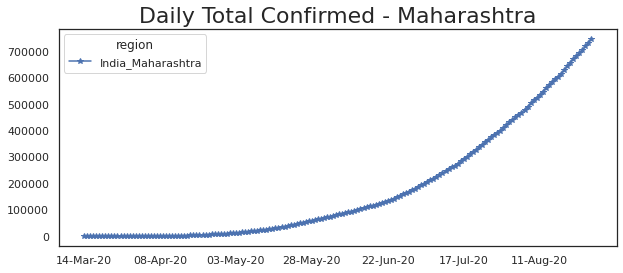

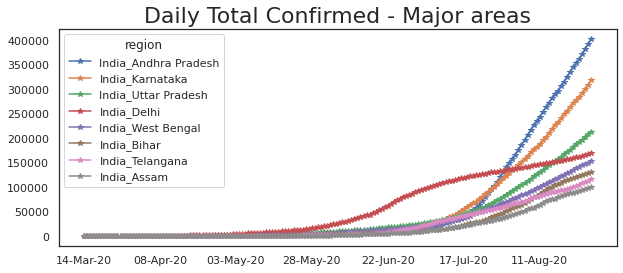

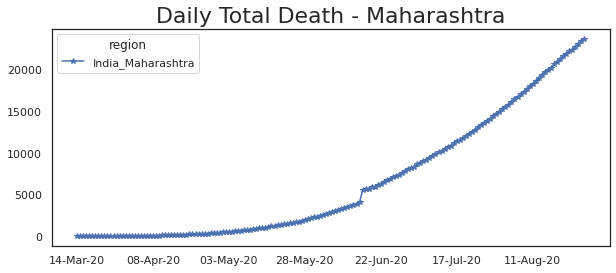

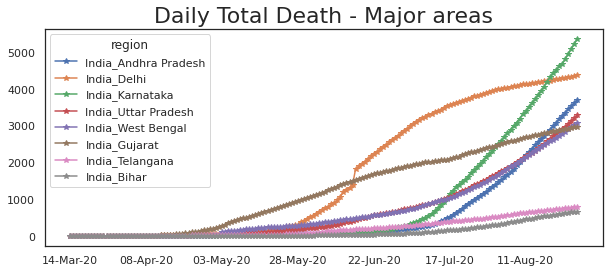

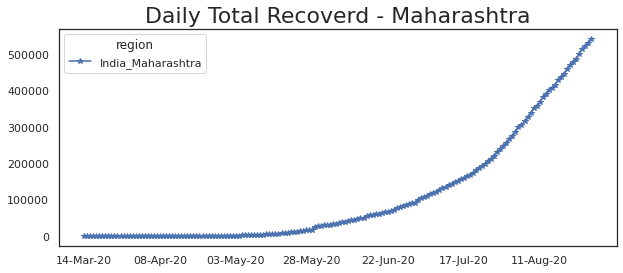

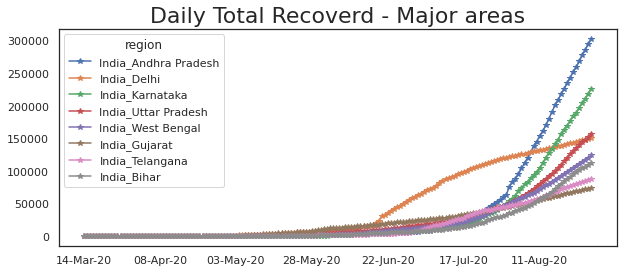

In [52]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Maharashtra',fontdict={'fontsize': 22}).figure.savefig('img1.png')
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22}).figure.savefig('img2.png')

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Maharashtra',fontdict={'fontsize': 22}).figure.savefig('img3.png')
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22}).figure.savefig('img4.png')

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Maharashtra',fontdict={'fontsize': 22}).figure.savefig('img5.png')
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22}).figure.savefig('img6.png')

## Kalman Filter With R


In [53]:
conda install -m rpy2

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [54]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [55]:
%%R
install.packages('pracma', repos='http://cran.us.r-project.org')
install.packages('reshape', repos='http://cran.us.r-project.org')
install.packages('readr', repos='http://cran.us.r-project.org')

In [56]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/28AugCSVs/ts_C28.csv?token=ALQ7JJRHXS5QM4RYNPPYT4S7KT3YU")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

In [57]:
p=%R pred_all

In [58]:
############ Merge R output due to package problem
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
p.set_index(temp.index,inplace=True)
#temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

## Pre Proccessing Data for ML Model

In [59]:
w=pd.read_csv('https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/28AugCSVs/w_hist.csv?token=ALQ7JJWOZSPOIZUDSGTNFMC7KT35C', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'])
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/28AugCSVs/w_fore.csv?token=ALQ7JJWNHNWK4HVJ3YLZGW27KT4AS', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'])

## Build Train Set Data Structure

In [60]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [62]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=(t.iloc[i-1,2]/t.iloc[i-2,2]-1)*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=(t.iloc[i-1,2]/t.iloc[i-4,2]-1)*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=(t.iloc[i-1,2]/t.iloc[i-8,2]-1)*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])
train=t.merge(confirmed[['region','Population']],how='left',on='region')
train=train.rename(columns = {'Population':'population'})
# train['population']=train['population'].str.replace(r" ", '')
# train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
train['infected_rate'] =train['last_day']/train['population']*10000
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
  if(np.isnan(train.iloc[i,13])):
    if(train.iloc[i,1] is train.iloc[i-1,1]):
      train.iloc[i,13]=train.iloc[i-1,13]
      train.iloc[i,14]=train.iloc[i-1,14]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':


## Kalman 1 day Prediction with Evaluation

               region           mse          rmse     mae
21  India_Maharashtra  3.435549e+09  58613.556713  5355.5


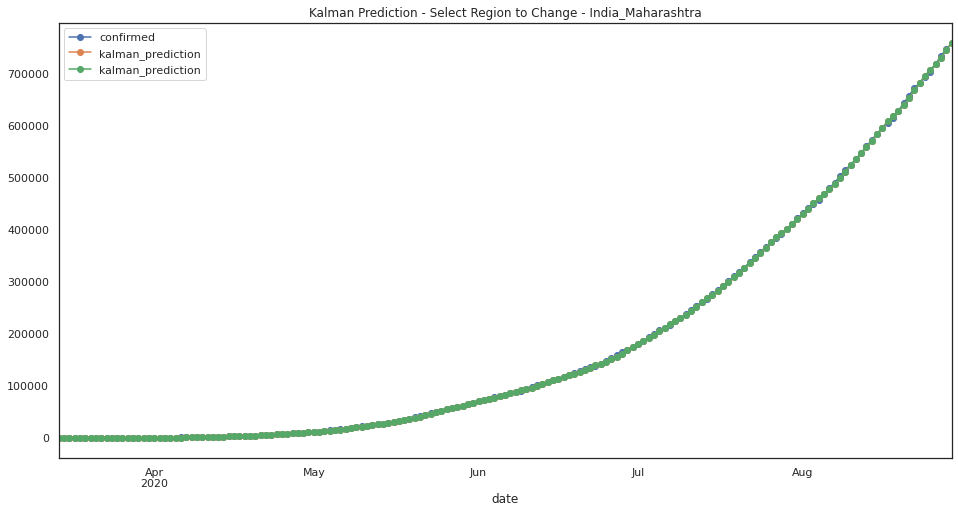

In [79]:
# Select region
region='India_Maharashtra'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
# p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0])).figure.savefig('img7.png')
print(evaluation[evaluation['region']==p.iloc[0,0]])
# print(evaluation)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p.tail(10)

## Correlation Matrix And Temperature

Correlation Matrix


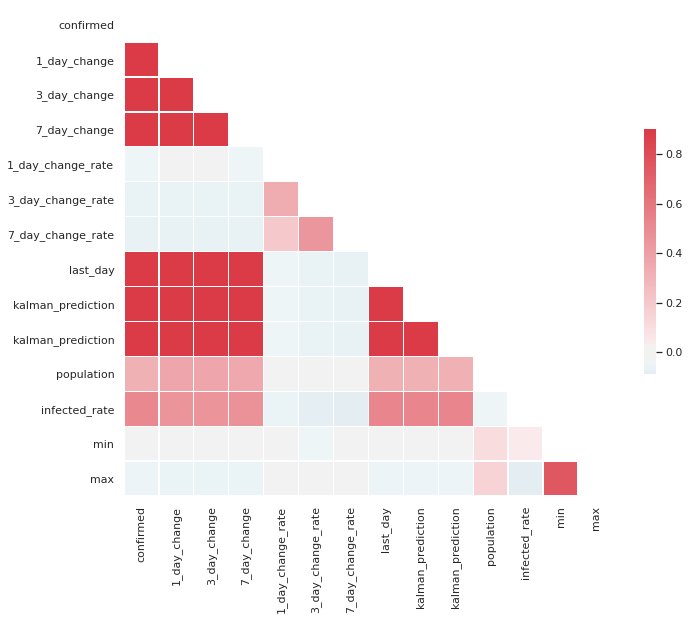

In [69]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).figure.savefig('img8.png')
print ('Correlation Matrix')

In [70]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.907518
3_day_change         0.912964
7_day_change         0.924992
1_day_change_rate   -0.036372
3_day_change_rate   -0.058635
7_day_change_rate   -0.066853
last_day             0.973792
kalman_prediction    0.974073
kalman_prediction    0.974073
population           0.319798
infected_rate        0.516756
min                  0.028884
max                 -0.043508
Name: confirmed, dtype: float64


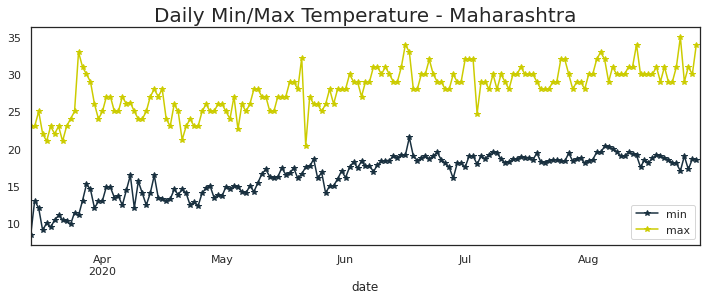

In [71]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='India_Maharashtra']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Maharashtra',fontdict={'fontsize': 20}).figure.savefig('img9.png')

In [72]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:10,1:])

Most infected Areas Avg Temperature
                            min        max
region                                    
India_Maharashtra     16.444048  27.906548
India_Tamil Nadu      23.319048  34.052976
India_Andhra Pradesh  21.119048  32.818452
India_Delhi           24.067857  36.957143
India_Karnataka       22.411905  33.027976
India_Uttar Pradesh   24.810714  35.126190
India_West Bengal     25.673810  34.000000
India_Gujarat         26.679167  37.110119
India_Telangana       26.414881  37.326786
India_Bihar           23.817262  31.818452


## Kalman X Days Ahead Prediction

In [73]:
%%R
install.packages('reshape', repos='http://cran.us.r-project.org')

In [74]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/28AugCSVs/ts_C28.csv?token=ALQ7JJXV3ONARHJ3QQO6MES7KT6AG")
all$X1<-NULL
for (i in 1:30) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

In [75]:
all_new=%R all_new

In [76]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction India_Maharashtra')

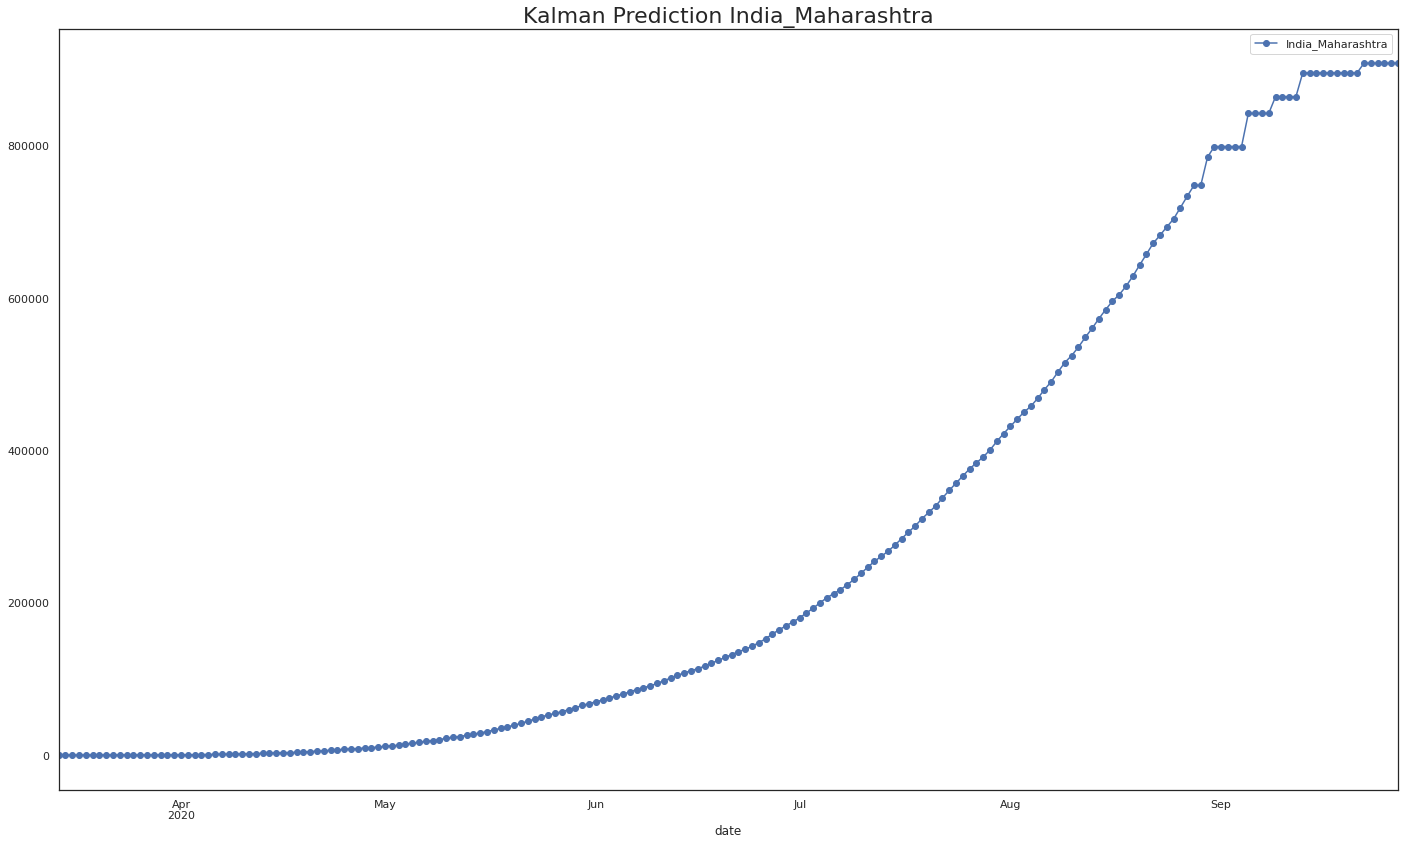

In [77]:
# Select region
region = ['date', "India_Maharashtra"]
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction {}'.format(region[1]), fontdict={'fontsize': 22})


In [78]:
prediction_one_month = p_kalman.tail(30)
prediction_two_weeks = prediction_one_month.head(15)
prediction_two_weeks

,India_Maharashtra
date,
2020-08-29,747995.0
2020-08-30,785175.0
2020-08-31,798981.0
2020-09-01,798981.0
2020-09-02,798981.0
2020-09-03,798981.0
2020-09-04,798981.0
2020-09-05,842460.0
2020-09-06,842460.0
